In [2]:
import pandas as pd

# Read x_train.txt
X = pd.read_csv('../data/x_train.txt', sep=' ', header=None)

# Read y_train.txt
y = pd.read_csv('../data/y_train.txt', sep=' ', header=None)


# Display the data
print("x:")
print(X.head())

print("\ny:")
print(y.head())

x:
        0         1         2         3         4         5         6    \
0 -2.619773 -2.619533 -1.199350 -1.083335 -1.000910 -0.366967 -2.164037   
1 -1.415579 -1.782544 -2.880270 -1.958863  1.159968  0.273030 -1.628728   
2 -2.745092 -1.382945 -1.626015 -1.282560 -0.663146  0.052349 -2.403322   
3  0.618998  0.455364 -0.115081  0.649040 -0.862207  2.308504  0.526114   
4 -0.070694 -0.550509 -0.565556 -0.693065 -0.573089 -0.395862  0.003170   

        7         8         9    ...        490        491        492  \
0 -1.210001 -0.658311 -1.489539  ...  10.849925  10.343346  10.717519   
1 -0.175813 -0.916857 -0.570166  ...  11.489417   5.195818   3.494627   
2 -0.765073 -0.394354 -0.806624  ...  13.934934   9.267515   4.705604   
3 -1.094852  1.088656 -0.481210  ...  12.021328   3.852231  11.059702   
4 -0.981609 -0.505775 -0.758430  ...   7.537788  11.229665  11.318915   

        493        494        495        496        497        498        499  
0  7.709295   5.894554  12.

In [3]:
dff = pd.read_csv('df_sorted_boruta.csv')
dff = dff.sort_values(by='ranking', ascending=True)
dff = dff[:100]

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

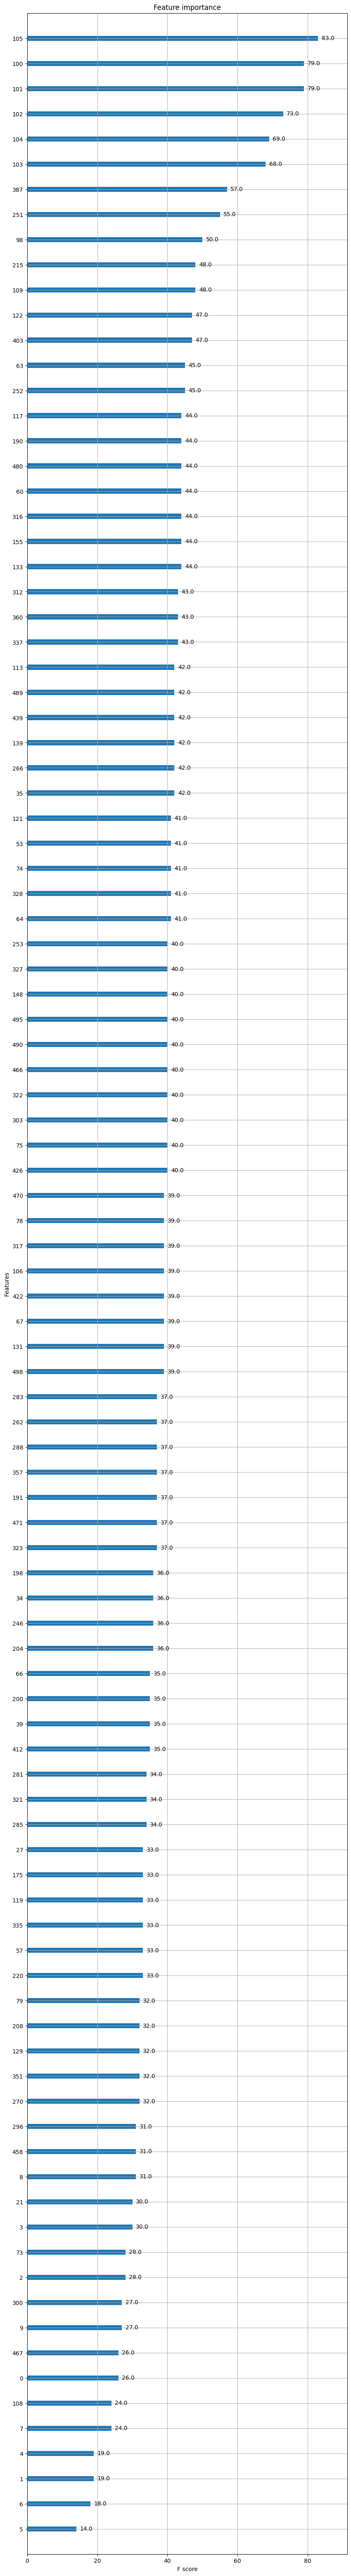

In [14]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, plot_importance

indices = dff['idx'].values

model = XGBClassifier()
fitres= model.fit(X.iloc[:, indices], y.values.ravel())

fig, ax = plt.subplots(figsize=(10, 80))
plot_importance(model, ax=ax)
plt.show()

In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

X_selected = X.iloc[:, indices]

model = SVC(kernel='linear')
rfe = RFE(model, n_features_to_select=1, verbose=3)
fitres = rfe.fit(X_selected, y.values.ravel())

Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 f

In [22]:
fitres.ranking_[fitres.ranking_.argsort()]

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [23]:
X_selected.columns[fitres.ranking_.argsort()]

Index([285, 335, 323, 303, 220, 321, 252, 351, 360, 281, 328, 204, 253, 266,
       327, 357, 215, 288, 387, 322, 200, 296, 208, 316, 283, 317, 155, 337,
        60,  64,   4,   7,  75, 175,  35, 148,  98, 246, 105,  21,  57, 312,
        79, 104,  67, 198,  66,  39, 191,  73,  34,  53, 139,  27, 117, 131,
       133, 403, 498, 300, 129, 119, 102, 412, 101, 103, 466,  74, 109, 458,
       471, 489, 495, 470, 106, 108,   0,  78, 122, 121, 422,   3, 426, 190,
       467,   8, 270,   2, 262,   5, 480, 251, 490, 100, 439,   9,  63,   6,
       113,   1],
      dtype='int64')

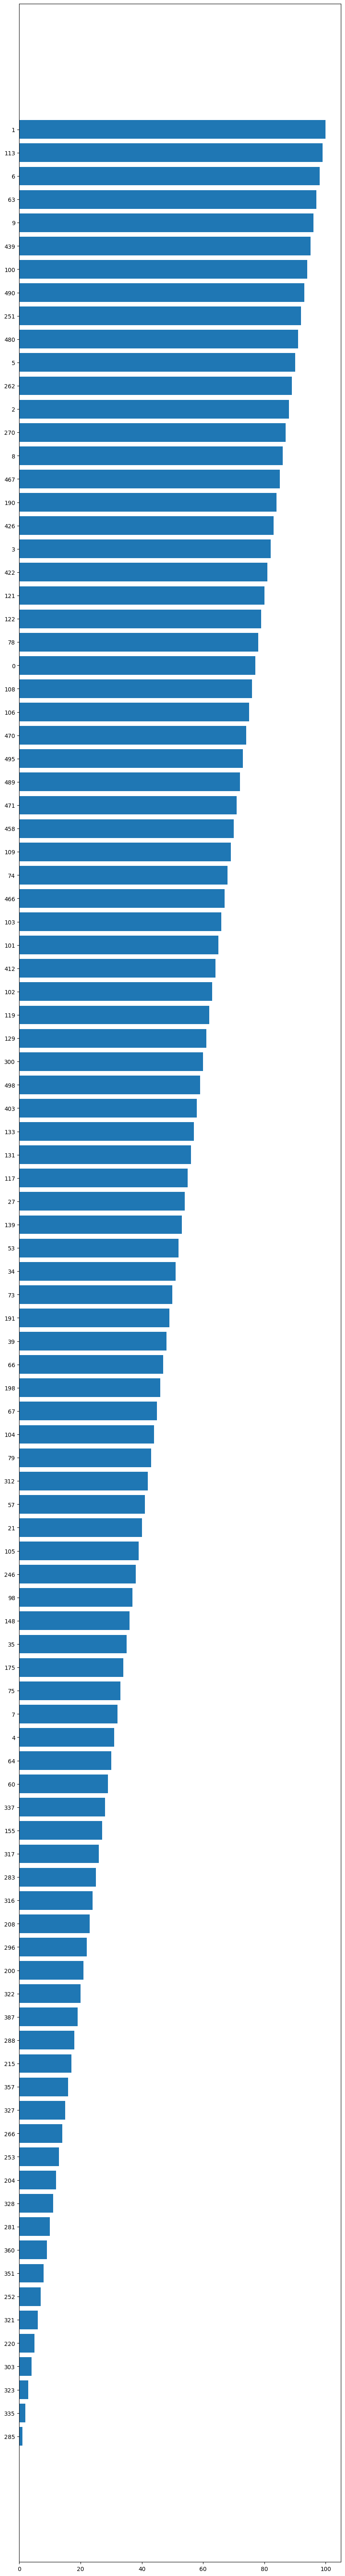

In [20]:
plt.figure(figsize=(10, 80))
plt.barh(range(X_selected.shape[1]), fitres.ranking_[fitres.ranking_.argsort()])
plt.yticks(range(X_selected.shape[1]), X_selected.columns[fitres.ranking_.argsort()])
plt.show()

In [39]:
import numpy as np

X_std = X_selected.copy()
col_list = X_selected.columns

n = X_std.shape[0]

# Initialize a list to hold the names of the features to be removed
features_to_remove = []

while X_std.shape[1] > 0:
    # Fit a linear regression model
    model = LogisticRegression(max_iter=10000, penalty='l1', solver='liblinear', n_jobs=1)
    model.fit(X_std, y.to_numpy().reshape(-1, 1).ravel())

    # Calculate the BIC
    residuals = y.to_numpy().reshape(-1, 1).ravel() - model.predict(X_std).reshape(-1, 1).ravel()  
    sse = np.sum(residuals**2)
    p = X_std.shape[1]
    bic = n * np.log(sse/n) + p * np.log(n)

    # Calculate the contribution of each feature to the BIC
    feature_bic_contributions = np.abs(model.coef_.flatten()) / bic

    # Find the feature with the smallest contribution to the BIC
    min_contrib_index = np.argmin(feature_bic_contributions)

    # Add the feature to the list of features to be removed
    features_to_remove.append(col_list[min_contrib_index])

    # Remove the feature from the dataset
    X_std = np.delete(X_std, min_contrib_index, axis=1)

    col_list = np.delete(col_list, min_contrib_index)

print('Features to remove in order:', features_to_remove)

Features to remove in order: [285, 220, 323, 252, 335, 321, 303, 360, 351, 328, 266, 204, 288, 215, 296, 281, 327, 357, 253, 283, 317, 322, 337, 208, 387, 200, 316, 64, 155, 35, 270, 175, 57, 75, 21, 191, 148, 105, 2, 104, 9, 6, 1, 8, 0, 7, 262, 312, 60, 98, 246, 34, 66, 73, 102, 198, 139, 67, 108, 101, 39, 109, 79, 27, 131, 106, 300, 117, 3, 133, 78, 103, 113, 53, 74, 403, 4, 412, 498, 119, 458, 466, 489, 470, 129, 495, 471, 422, 426, 121, 490, 467, 5, 439, 63, 190, 100, 480, 122, 251]


In [46]:
features_to_remove[-10:]

[490, 467, 5, 439, 63, 190, 100, 480, 122, 251]

In [47]:
X_selected.columns[fitres.ranking_.argsort()][:10]

Index([285, 335, 323, 303, 220, 321, 252, 351, 360, 281], dtype='int64')

In [50]:
df_1['idx'].values[:10]

array([105, 100, 102, 103, 101, 104, 328, 295, 215, 210], dtype=int64)

In [51]:
df_2['idx'].values[:10]

array([  0,   5,   3,   2,   1,   7,   6, 101,   4,   9], dtype=int64)

In [60]:
cand = list(df_1['idx'].values[:10]) + list(df_2['idx'].values[:10]) + list(X_selected.columns[fitres.ranking_.argsort()][:10])
len(cand)

30

In [61]:
candidates = list(set(cand))
len(candidates)

29

In [62]:
print(candidates)

[0, 1, 2, 3, 4, 5, 6, 7, 9, 281, 285, 295, 303, 321, 323, 328, 335, 210, 215, 220, 351, 100, 101, 102, 103, 104, 105, 360, 252]


In [26]:
X_std

,0,5,3,2,1,7,6,101,4,9,...,66,122,251,113,78,117,387,198,470,121
0,-2.619773,-0.366967,-1.083335,-1.199350,-2.619533,-1.210001,-2.164037,0.713780,-1.000910,-1.489539,...,-0.560018,1.172592,0.624834,-0.000311,-0.404061,0.564816,0.316858,-0.190083,2.951318,1.207710
1,-1.415579,0.273030,-1.958863,-2.880270,-1.782544,-0.175813,-1.628728,0.506429,1.159968,-0.570166,...,-1.009197,0.263290,0.123455,-0.183234,0.422193,3.470655,0.111505,0.770795,13.313979,1.539511
2,-2.745092,0.052349,-1.282560,-1.626015,-1.382945,-0.765073,-2.403322,-0.112797,-0.663146,-0.806624,...,-0.417313,-2.337561,0.484696,0.920002,-0.161847,-1.011283,0.799578,-0.229918,18.989431,1.016691
3,0.618998,2.308504,0.649040,-0.115081,0.455364,-1.094852,0.526114,0.777688,-0.862207,-0.481210,...,1.490404,-0.398006,0.221951,-1.596326,-1.642939,0.945868,0.922677,0.968569,1.836664,-0.207128
4,-0.070694,-0.395862,-0.693065,-0.565556,-0.550509,-0.981609,0.003170,0.579971,-0.573089,-0.758430,...,0.003188,0.688339,0.544495,-0.772971,-0.581572,1.205500,0.001506,-0.650624,15.788068,0.456116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.106210,-0.544141,-0.827217,-2.073105,-1.958227,0.577295,-1.176375,-0.041932,0.797188,-0.691466,...,0.312672,0.183690,0.326033,0.061707,0.411408,-0.904125,0.163680,0.228857,11.326776,0.599801
4996,-3.203265,-3.293880,-1.769853,-1.303455,-3.604215,-3.727836,-3.031679,0.098028,-3.093612,-2.562465,...,0.080044,-0.084221,0.721227,0.847909,-0.447749,-0.448308,0.569775,1.081002,11.822453,-0.222851
4997,-0.418994,-1.455748,-1.414368,-1.057789,-3.164231,0.155972,-1.530525,-1.730745,0.495049,-3.139882,...,-1.478144,-1.638513,0.951997,-0.048776,0.669974,1.015552,0.460244,1.274030,7.862165,-1.119368
4998,2.291015,2.087545,0.475785,0.071849,1.073697,1.198370,2.393297,0.568479,1.203500,0.829632,...,0.453680,0.004957,0.289300,-1.814392,0.519566,-0.684129,0.723742,0.909473,5.300429,-1.191729


In [2]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns


# Compute the mutual information between each feature and the target
mi = mutual_info_classif(X, y.values.ravel())

KeyboardInterrupt: 

In [ ]:
mi_dict = dict(zip(range(len(mi)), mi))
mi_df = pd.DataFrame(list(mi_dict.items()), columns=['idx', 'ranking'])
mi_df_sorted = mi_df.sort_values(by='ranking', ascending=False)

In [28]:
mi_df_sorted

,idx,ranking
101,101,0.023190
136,136,0.022931
296,296,0.022910
328,328,0.022556
110,110,0.022383
...,...,...
207,207,0.000000
203,203,0.000000
201,201,0.000000
200,200,0.000000


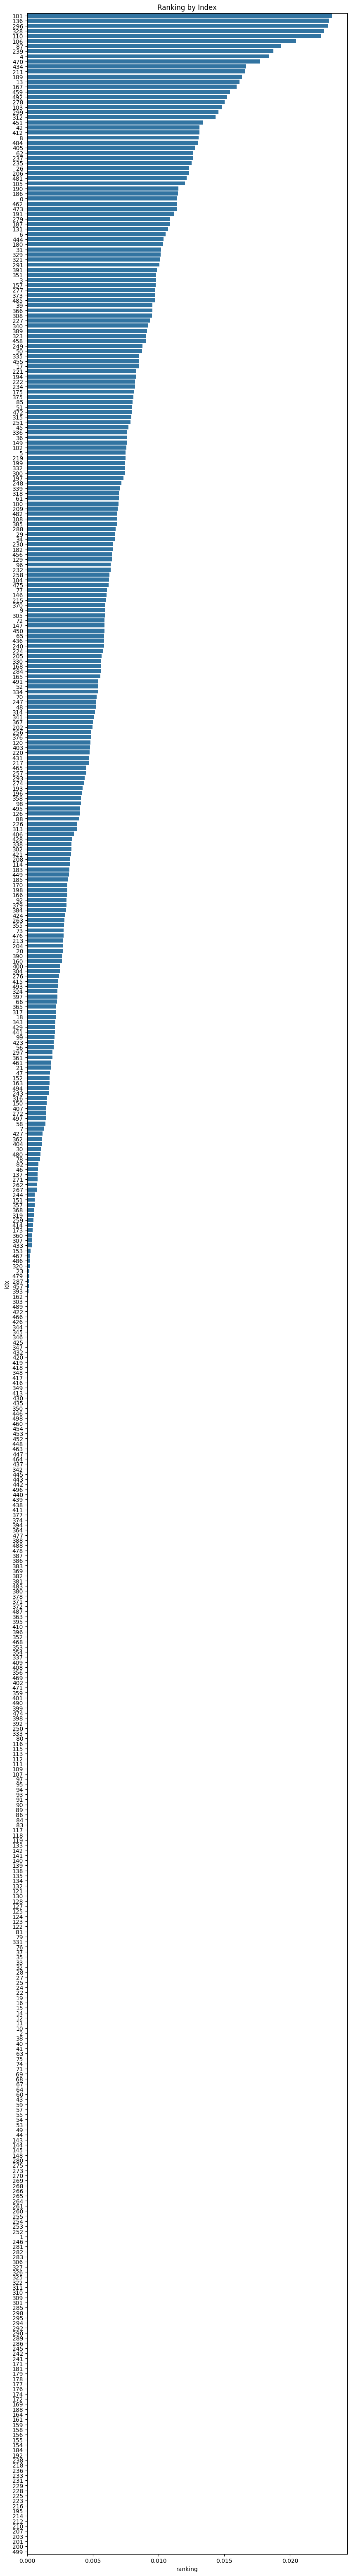

In [12]:
plt.figure(figsize=(10, 80))
sns.barplot(x='ranking', y='idx', data=mi_df, order=mi_df_sorted['idx'], orient='h')
plt.title('Ranking by Index')
plt.show()

In [3]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
import pandas as pd

df_1 = pd.read_csv('feature_importance_xgb.csv')
df_1 = df_1.sort_values(by='ranking', ascending=False)
df_1 = df_1[:30]

In [4]:
df_2 = pd.read_csv('df_sorted_boruta.csv')
df_2 = df_2.sort_values(by='ranking', ascending=True)
df_2 = df_2[:30]

In [5]:
set(df_1['idx']).intersection(set(df_2['idx']))

{0, 8, 100, 101, 102, 103, 104, 105, 220, 328}

In [59]:
dff = pd.concat([df_1, df_2])
ind_both = dff['idx'].unique()

In [60]:
X_2 = X[ind_both]
X_2.head()

,105,100,102,103,101,104,328,295,215,210,...,253,317,66,122,251,113,117,387,198,470
0,1.049388,-0.915513,0.264032,-0.177042,0.713780,-0.123621,0.715032,0.178664,0.568967,0.972674,...,0.636770,0.570029,-0.560018,1.172592,0.624834,-0.000311,0.564816,0.316858,-0.190083,2.951318
1,-1.191206,-1.513469,1.071525,1.823868,0.506429,0.083758,0.792447,0.369327,0.116761,0.217355,...,0.054446,0.440366,-1.009197,0.263290,0.123455,-0.183234,3.470655,0.111505,0.770795,13.313979
2,-0.626576,-1.215839,-0.162820,0.771938,-0.112797,1.255190,0.814218,0.819446,0.327005,0.597927,...,0.809372,0.657884,-0.417313,-2.337561,0.484696,0.920002,-1.011283,0.799578,-0.229918,18.989431
3,0.861478,1.167745,-1.572364,0.211630,0.777688,3.029617,0.291014,0.305780,0.299700,0.327286,...,0.876631,0.087235,1.490404,-0.398006,0.221951,-1.596326,0.945868,0.922677,0.968569,1.836664
4,-1.422561,0.219875,0.702204,-0.455936,0.579971,0.993229,0.865625,0.541561,0.790094,0.401022,...,0.607914,0.412241,0.003188,0.688339,0.544495,-0.772971,1.205500,0.001506,-0.650624,15.788068


In [63]:
from sklearn.feature_selection import RFECV

estimator = SVC(kernel="linear")
selector = RFECV(estimator, step=1, cv=5, n_jobs=-1, scoring='accuracy', min_features_to_select=1, verbose=3)
selector = selector.fit(X_2, y.values.ravel())

KeyboardInterrupt: 

In [ ]:
selector.support_

In [25]:
ranking = selector.ranking_
ranking_dict = dict(zip(ind_both, ranking))
ranking_df = pd.DataFrame(list(ranking_dict.items()), columns=['idx', 'ranking'])
ranking_df_sorted = ranking_df.sort_values(by='ranking', ascending=True)

ranking_df_sorted[:50]

,idx,ranking
48,285,1
29,220,2
61,323,3
75,335,4
72,321,5
66,252,6
77,360,7
63,351,8
6,328,9
38,339,10


In [29]:
mi_df_sorted[:50]

,idx,ranking
101,101,0.023190
136,136,0.022931
296,296,0.022910
328,328,0.022556
110,110,0.022383
106,106,0.020450
87,87,0.019329
239,239,0.018714
4,4,0.018429
470,470,0.017727


In [39]:
df_1['idx']

0     105
1     100
2     102
3     103
4     101
5     104
6     328
7     295
8     215
9     210
10    225
11    237
12    249
16    169
18    203
17    228
13    340
15    284
14    127
27    194
35      8
33    486
32      0
31    383
30     80
29     81
28    355
34     24
26    190
24    220
23    330
22    329
21    164
19     39
20    258
25    204
50     29
47    109
49    339
54    214
51    460
52    218
53     35
45     87
46    471
48    199
44    121
42    399
41    285
40    138
Name: idx, dtype: int64

In [40]:
df_2['idx']

0       0
15      5
13      3
12      2
11      1
10      7
9       6
8     101
14      4
6       9
5     105
4     104
3     103
2     102
7       8
1     100
16    285
17    220
18     64
19    403
20    133
21    204
22    323
23    270
24    351
25    129
26    471
27    328
28     74
29    252
30    337
31    155
32    109
33    316
34    458
35    498
36    321
37    215
38     57
39     63
40    335
41    412
42    360
43    426
45    131
46     21
44     60
47     39
48    191
49    281
Name: idx, dtype: int64

In [42]:
ranking_df_sorted = ranking_df_sorted[:50]
ranking_df_sorted['idx']

48    285
29    220
61    323
75    335
72    321
66    252
77    360
63    351
6     328
38    339
39    214
12    249
14    203
35    204
8     215
83    281
67    337
10    225
15    228
69    316
26    355
9     210
34    258
47    399
41    218
31    329
17    284
68    155
58     64
73     57
81     60
30    330
42     35
36     29
82    191
7     295
16    340
45    199
5     104
2     102
79    131
37    109
3     103
55      6
1     100
4     101
80     21
27     24
33     39
24     80
Name: idx, dtype: int64

In [43]:
mi_df_sorted = mi_df_sorted[:50]
mi_df_sorted['idx']

101    101
136    136
296    296
328    328
110    110
106    106
87      87
239    239
4        4
470    470
434    434
211    211
189    189
13      13
167    167
459    459
492    492
278    278
103    103
299    299
312    312
451    451
42      42
412    412
8        8
484    484
405    405
62      62
237    237
235    235
26      26
206    206
481    481
105    105
190    190
186    186
0        0
462    462
473    473
191    191
279    279
187    187
131    131
6        6
444    444
180    180
31      31
329    329
321    321
291    291
Name: idx, dtype: int64

In [45]:
set(ranking_df_sorted['idx']).intersection(set(df_1['idx'])).intersection(set(df_2['idx']))

{39, 100, 101, 102, 103, 104, 109, 204, 215, 220, 285, 328}

In [56]:
ranking_df[ranking_df['idx'] == 9]

,idx,ranking
57,9,82
